# Mastering the Lydia Diamond Game
### Designing Self-organized network protocols with Multi-Agent ML

**Topics: Reinforcement Learning, Multi-Agent Systems, Control Theory**

The “Count-to-Ten” game—or as we refer to it, the Lydia Diamond Game—is a popular team-building ice-breaker which challenges how mutli-agent systems can master global policies in the face of stochastic environments. 
We explore crude machine learning and control theory approaches to build interpretability towards how multi-agent systems strategize in the  face of stochastic environments.

Pre-print Link: https://drive.google.com/file/d/1k3JXsoVp18oMq0Sxz0faZXx8USqqeaLk/view

**Author: Ishan Saha, Advisor: Radhika Nagpal**


### 1. Introduction to the Lydia Diamond Game

The “Count-to-Ten” game—or as we refer to it, the Lydia Diamond Game—is an icebreaker game popular
among team-building exercises. Given n players and a time limit t, the goal of the game is for the players
to collectively count as high as possible without explicitly colluding or strategizing. However, if at least
two players announce a number at the same time, the game ends at the last number which was last
successfully counted.

Different variations of the Lydia Diamond game have been played, with some incorporating rules
regarding eye contact or time limits. Yet, American Playwright Lydia Diamond claims that after playing the
game at the beginning and end of every theater rehearsal, her group was able to learn to consistently
count to 10 as a collective. While such a claim of mastering this game is impressive, the in-person counting
game may be prone to collusion because players may be able to distinguish each other by their voice and
location.

However, if we kept practicing the Lydia Diamond game while only being informed track of how high group
counts, is it possible for a group of players to collectively master the Lydia Diamond game? This stochastic setting shares applications in self-organizing carrier protocols exployed by wired and ethernet channels, as designing stronger collision avoidance protocls resolves bottlenecks in the fields of data transmission and reception.

In [3]:
import random as rnd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from matplotlib.widgets import Slider


def iterFunc(arr, t): #Function for a Player Randomly Guessing Time Values
    val = int(arr[0] * t + arr[1] * rnd.randrange(1, t+1))  
    val = val%t + 1
    return val


def iterate(rng, t): #Simulating everyone guessing a time only once
    check = True
    state = []
    count = 0
    minTime = 0
    for a in range(len(rng)):   #Generating Random Time Value Guesses for All Players
        val = iterFunc(rng[a], t)
        state.append(val)
    minTime = min(state)        #finding the minimum time value of all the players
    sameVal = []   
    for b in range(len(state)): #counting the number of times people landed on the minimum time
        if (state[b]==minTime):
            count = count + 1
            sameVal.append(b)
            
    if count > 1:               #if more than one person landed on the minimum time, then set check = false
        check = False
    return check, state, minTime, sameVal

def simulate(rng, tfinal):
    num = 0
    check = True
    t = 1
    while (check == True):
        check, state, addedTime, sameVal = iterate(rng, tfinal - t)  #simulating time value guesses based on remaining time (tfinal - t)
        t = t + addedTime                                            #add the timme back
        num = num + 1
        if (t >= tfinal):
            check = False
            #return num, t, rng, sameVal
        #print("Num: ", num, "Time: ", t, "State: ", state, "sameVal: ", sameVal)
    #print("Done")
    
    return num, t, rng, sameVal


#CASE 1: No Learning, time limit constraint
def multipleSimulate(players, timeLimit, simNum):
    randParam = []
    for a in range(players):
        randParam.append([0, 1])
    numArr = []
    timeArr = []
    for a in range(simNum):
        num, time, rng, sameVal = simulate(randParam, timeLimit)
        numArr.append(num)
        timeArr.append(time)
    return numArr, timeArr


#CASE 2: Learning, time limit constraint
def multipleSimulateLearn(players, timeLimit, simNum):
    randParam = []
    for a in range(players):
        randParam.append([0., 1.0])
    numArr = []
    timeArr = []
    sameArr = []
    rngArr = []
    for a in range(simNum):
        num, time, rng, sameVal = simulate(randParam, timeLimit)
        sameArr.append(sameVal)
        numArr.append(num)
        timeArr.append(time)
        rngArr.append(copy.deepcopy(randParam))
        
        for i in sameVal:
            value = randParam[i]
            randParam[i][0] = (rnd.uniform(-.1,.1)) * (1/num) + value[0]    
            randParam[i][1] = (rnd.uniform(-.1,.1)) * (1/num) + value[1]
            randParam[i][0] = randParam[i][0] % 1
            randParam[i][1] = randParam[i][1] % 1
        

    return numArr, timeArr, rngArr


### 2. Traditional Model Simulation and ML Model

To study how the players collectively count as a group, the paper studies the following variation of the
Lydia Diamond game. Given n players in the Lydia Diamond game, the players will consecutively count
numbers, starting from “1”, as a collective without explicitly strategizing. To count as a group, each
player selects a random time to speak within the time limit, assisted with a global timer the players
can track. However, if at least two players collide by announcing a number at the same time, the game
ends at this last number counted. In addition, if the time limit is reached, the game is over with the
last number counted.

The following is a case of 10 players, playing the Lydia game within a time limit of 100.

In [9]:
#CASE 1: No Learning, time limit constraint

timeLimit = 100
players = 10
simNum = 1000
playerData = []


p1 = plt.figure(figsize=(10, 8))
plot1 = p1.add_subplot()

for a in range(1, players+1):
    numArr, timeArr = multipleSimulate(a, timeLimit, simNum)
    d = {'Number': numArr, 'Time': timeArr}
    df = pd.DataFrame(data=d)
    playerData.append(df.sort_values("Number", axis = 0, ascending = True))
    df.min(skipna = False)
    avgNum = playerData[-1]["Number"].unique()
    avgTime = []
    for b in avgNum:
        avgTime.append(np.average(playerData[-1].loc[playerData[-1]["Number"] == b, "Time"]))
        
    #plot1.plot(playerData[-1]['Number'],playerData[-1]['Time'], label=("Players: "+str(a+1)))
    plot1.plot(avgNum, avgTime, label=("Players: "+str(a)))
    plot1.scatter(avgNum, avgTime)
    

plot1.set_title(str(players) + "-Person Lydia Diamond, No Learning (t = "+str(timeLimit)+", sim = "+str(simNum)+")")

plot1.set_xlabel("Number")
plot1.set_ylabel("Time")
plt.legend()



<IPython.core.display.Javascript object>

Here, we can see a histogram of the Lydia Diamond Game to better analyze how a stochastic model of the game can be simulated over multiple simulations of time.

In [ ]:

#CASE 1: No Learning, time limit constraint


timeLimit = 100
players = 20
simNum = 10000
playerData = []

p1 = plt.figure(figsize=(10, 8))
plot1 = p1.add_subplot()
means = []

plotRange = range(1, players+1)
for a in plotRange:
    numArr, timeArr = multipleSimulate(a, timeLimit, simNum)
    #plot1.plot(range(1,len(numArr)+1), numArr, label=("Players: "+str(a), np.mean(numArr)))
    plot1.hist(numArr, 100, label=("Players: "+str(a)))
    means.append(np.mean(numArr))
    print("Players: "+str(a)+", mean: "+str(np.mean(numArr)))

plot1.set_title("Histogram of Lydia Diamond, No Learning (t = "+str(timeLimit)+", sim = "+str(simNum)+")")
plot1.set_xlabel("Highest Number Counted")
plot1.set_ylabel("Frequency")
plt.ylim([0, 2300])

plot1.legend()

    


How does this compare with the number of players in the game? We can understand strageies here as well.

In [ ]:
pMean = plt.figure(figsize=(10, 8))
meanPlt = pMean.add_subplot()
meanPlt.plot(plotRange,means)
meanPlt.scatter(plotRange,means)
meanPlt.set_title("Number of Players versus Average Number Counted")
meanPlt.set_xlabel("Number of Players")
meanPlt.set_ylabel("Average Number Counted")

Now, instead of randomly sampling the strategies of the multi-agent players, we turn to study a stochastic RL approach to better analyze methods to count higher numbers. In this crude approach, we design a crude machine learning model: from a loss function optimizing the number counted within the time constrains, to the random adjustments of parameters in the model. This ML frakework is  designed from scratch by the author.

In [ ]:
#CASE 1: Learning, time limit constraint

timeLimit = 100
players = 7
simNum = 100000
playerData = []


p2 = plt.figure(figsize=(10, 8))
plot2 = p2.add_subplot()
numArrNL, timeArrNL = multipleSimulate(players, timeLimit, simNum)





#CASE 2: Learning, time limit constraint
playerData = []


numArrL, timeArrL, rngArr = multipleSimulateLearn(players, timeLimit, simNum)

plot2.set_title(str(players) + "-Person Lydia Diamond, Learning (t = "+str(timeLimit)+", sim = "+str(simNum)+")")
plot2.set_xlabel("Simulations")
plot2.set_ylabel("Number Counted")


plot2.plot(range(1,len(numArrL)+1), numArrL, label = "Learning")
plot2.plot(range(1,len(numArrNL)+1), numArrNL, label = "Not Learning")
plot2.legend()


print(max(numArrL))


We see here that our observations are capable of learning powerful expressions of the Lydia Diamond game. However, to learn how the mutli-agent system masters such stochastic policies, we can study the histogram of the players' average counting, and the relationship of no. of players to counted number.

In [ ]:

#CASE 2: Learning, time limit constraint


timeLimit = 100
players = 20
simNum = 10000
playerData = []

p1 = plt.figure(figsize=(10, 8))
plot1 = p1.add_subplot()
means = []

plotRange = range(1, players+1)
for a in plotRange:
    numArr, timeArr, rngArr = multipleSimulateLearn(a, timeLimit, simNum)
    #plot1.plot(range(1,len(numArr)+1), numArr, label=("Players: "+str(a), np.mean(numArr)))
    plot1.hist(numArr, 100, label=("Players: "+str(a)))
    means.append(np.mean(numArr))
    print("Players: "+str(a)+", mean: "+str(np.mean(numArr)))

plot1.set_title("Histogram of Lydia Diamond, Learning (t = "+str(timeLimit)+", sim = "+str(simNum)+")")
plot1.set_xlabel("Highest Number Counted")
plot1.set_ylabel("Frequency")
plt.ylim([0, 2300])

plot1.legend()

    


In [ ]:
pMean = plt.figure(figsize=(10, 8))
meanPlt = pMean.add_subplot()
meanPlt.plot(plotRange,means)
meanPlt.scatter(plotRange,means)
meanPlt.set_title("Number of Players versus Average Number Counted (Learning Model)")
meanPlt.set_xlabel("Number of Players")
meanPlt.set_ylabel("Average Number Counted")
plt.ylim([1, 35])

How do the parameters change? We can study this here...

In [ ]:
#rngArr: TimeStep, Person, Y-Intercept, Coefficient

p3 = plt.figure(figsize=(10, 4))
plot3 = p3.add_subplot()


coeffvstime = []
for p in range(len(rngArr[0])):
    pArray = [[],[]]
    for a in range(len(rngArr)):
        pArray[0].append(rngArr[a][p][0])
        pArray[1].append(rngArr[a][p][1])
    coeffvstime.append(pArray)
    plot3.plot(range(1,len(pArray[0])+1), pArray[0], label = "P"+str(p+1)+" (b)")
    plot3.plot(range(1,len(pArray[1])+1), pArray[1], label = "P"+str(p+1)+" (m)")

    
plot3.set_title(str(players) + "-Person Lydia Diamond, Learning (t = "+str(timeLimit)+", sim = "+str(simNum)+")")
plot3.set_xlabel("Simulations")
plot3.set_ylabel("Coefficients")
plot3.legend()

However, in terms of what the model learns from a stochastic perspective, we can plot the learning histogram and range of the variaitonal auto-encoder inspired approach. Once analyzing the state, we see what strategy the model is actually learning: one such that only one player consistently counts every single number.

In [ ]:




def statePlot(inputArr, num):
    totalVal = []
    playerVal = []
    p4 = plt.figure(figsize=(10, 8))
    plot4 = p4.add_subplot()
    finalState = inputArr
    for a in range(len(finalState)):
        val = []
        for b in range(10000):
            iterVal = abs(finalState[a][0] + finalState[a][1] * rnd.random())
            val.append(iterVal % 1 )
        #print(finalState[a])
        totalVal.append(val)
        playerVal.append("Player "+str(a+1))
    plot4.set_title("Distribution of Randomly Selecting Times at State: " + str(num))
    plot4.hist(totalVal, bins = 50, density=True,histtype='bar', label = playerVal, stacked = True)
    plot4.legend()



statePlot(rngArr[0], 0)

optimal = numArrL.index(max(numArrL))
statePlot(rngArr[optimal], optimal)

#statePlot(rngArr[-1])



statePlot(np.asarray(rngArr).mean(0), "average")

This raises the issue: one player counting all the numbers masters the policies. How can we adjust the simulation to limit this? We can create a consecutive rule to limit this behavior, and understand the strategy formed by the system.

### 3. Consecutive Rule Lydia-Diamond Game

While the experiment establishes a framework for implementing a learning model in the Lydia Diamond
game, we observe from the crude ML learning results that the collective counts highest when only one player is
active, while the other players are silenced . However, if a player was not allowed to speak
for the next turn, would the collective still be capable of learning to count higher than the traditional
model? To test this model, we implement a consecutive rule to our previous model—once a player
counts, they are not allowed to count the consecutive number.

In [26]:
#goal: no consecutive players

import random as rnd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from matplotlib.widgets import Slider
%matplotlib notebook

def iterFunc(arr, t): #Function for a Player Randomly Guessing Time Values
    val = int(arr[0] * t + arr[1] * rnd.randrange(1, t+1))  
    val = val%t + 1
    return val


def iterate(rng, t, cPlayers): #Simulating everyone guessing a time only once
    check = True
    state = []
    minTime = 0
    for a in range(len(rng)):   #Generating Random Time Value Guesses for All Players
        val = iterFunc(rng[a], t)
        state.append(val) 
    for c in cPlayers:  #if a player spoke in a previous turn, then they wouldn't be able to speak in the next turn
        state[c] = t    
        #not speaking in the next turn = guessing the highest possible number in the system
    minTime = min(state)        #finding the minimum time value of all the players
    sameVal = []   
    for b in range(len(state)): #counting the number of times people landed on the minimum time
        if (state[b]==minTime):
            sameVal.append(b)
    count = len(sameVal)
    if count > 1:               #if more than one person landed on the minimum time, then set check = false
        check = False
    return check, state, minTime, sameVal

def simulate(rng, tfinal):   #EDITED: Ensuring that no consecutive players go back to back
    num = 0
    check = True
    t = 1
    cPlayers = []
    while (check == True):
        check, state, addedTime, sameVal = iterate(rng, tfinal - t, cPlayers)  #simulating time value guesses based on remaining time (tfinal - t)
        t = t + addedTime                                            #add the timme back
        num = num + 1
        cPlayers = sameVal  #people who spoke in the prevous iterate cannot speak in the next iteration
        if (t >= tfinal):
            check = False
            #return num, t, rng, sameVal
        #print("Num: ", num, "Time: ", t, "State: ", state, "sameVal: ", sameVal)
    #print("Done")
    
    return num, t, rng, sameVal


#CASE 1: No Learning, time limit constraint
def multipleSimulate(players, timeLimit, simNum):
    randParam = []
    for a in range(players):
        randParam.append([0, 1])
    numArr = []
    timeArr = []
    for a in range(simNum):
        num, time, rng, sameVal = simulate(randParam, timeLimit)
        numArr.append(num)
        timeArr.append(time)
    return numArr, timeArr


#CASE 2: Learning, time limit constraint
def multipleSimulateLearn(players, timeLimit, simNum):
    randParam = []
    for a in range(players):
        randParam.append([0., 1.0])
    numArr = []
    timeArr = []
    sameArr = []
    rngArr = []
    for a in range(simNum):
        num, time, rng, sameVal = simulate(randParam, timeLimit)
        sameArr.append(sameVal)
        numArr.append(num)
        timeArr.append(time)
        rngArr.append(copy.deepcopy(randParam))
        #print("Sim",a, " Num", num, " Time", time)
        #print(sameVal)
        for i in sameVal:
            value = randParam[i]
            randParam[i][0] = (rnd.uniform(-.1,.1)) * (1/num) + value[0]    
            randParam[i][1] = (rnd.uniform(-.1,.1)) * (1/num) + value[1]
            randParam[i][0] = randParam[i][0] % 1
            randParam[i][1] = randParam[i][1] % 1
            #if randParam[i][1] > 1:
            #    randParam[i][1] = 0
            #if randParam[i][1] < 0:
            #    randParam[i][1] = 1
            #print(value, i, a)
        #print(copy.deepcopy(rngArr[-1]))
        

    return numArr, timeArr, rngArr


<IPython.core.display.Javascript object>


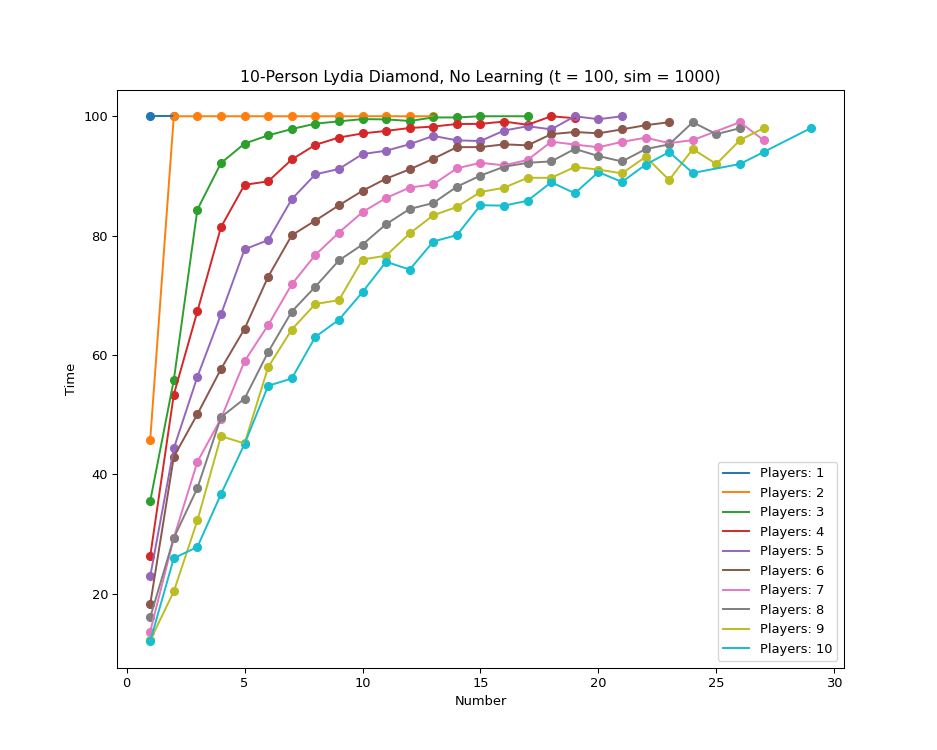

Text(0, 0.5, 'Time')

In [2]:

#CASE 1: No Learning, time limit constraint


timeLimit = 100
players = 10
simNum = 1000
playerData = []


p1 = plt.figure(figsize=(10, 8))
plot1 = p1.add_subplot()

for a in range(1, players+1):
    numArr, timeArr = multipleSimulate(a, timeLimit, simNum)
    d = {'Number': numArr, 'Time': timeArr}
    df = pd.DataFrame(data=d)
    playerData.append(df.sort_values("Number", axis = 0, ascending = True))
    df.min(skipna = False)
    
    
    avgNum = playerData[-1]["Number"].unique()

    avgTime = []
    for b in avgNum:
        avgTime.append(np.average(playerData[-1].loc[playerData[-1]["Number"] == b, "Time"]))
    #plot1.plot(playerData[-1]['Number'],playerData[-1]['Time'], label=("Players: "+str(a+1)))
    plot1.plot(avgNum, avgTime, label=("Players: "+str(a)))
    plot1.scatter(avgNum, avgTime)
    
    
    


plot1.set_title(str(players) + "-Person Lydia Diamond, No Learning (t = "+str(timeLimit)+", sim = "+str(simNum)+")")
plt.legend()
plot1.set_xlabel("Number")
plot1.set_ylabel("Time")


<IPython.core.display.Javascript object>


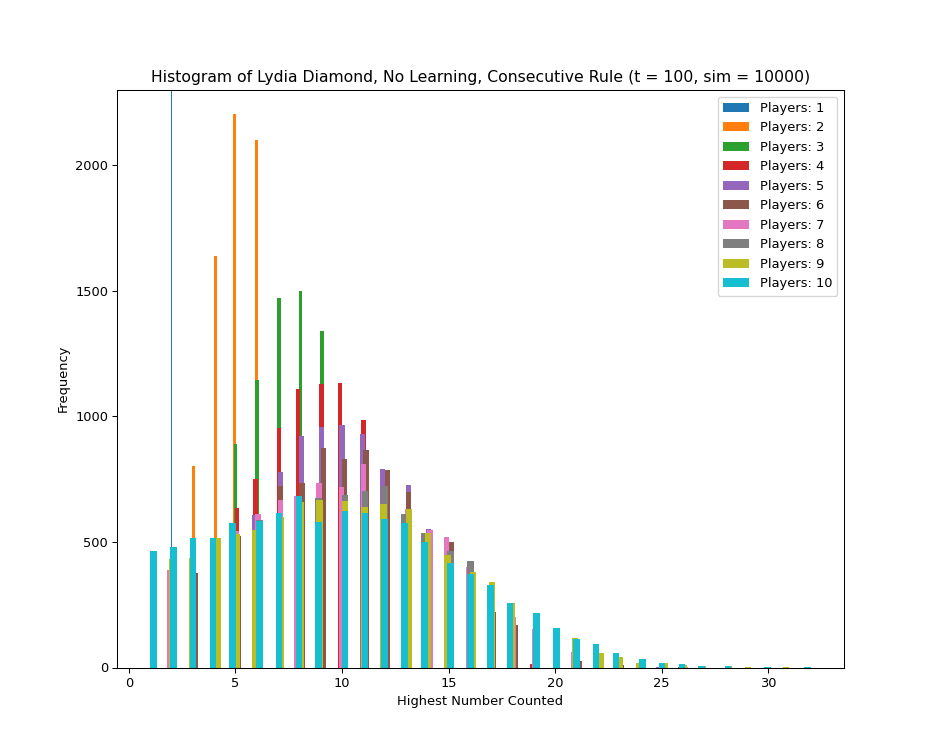

Players: 1, mean: 1.9901
Players: 2, mean: 5.6516
Players: 3, mean: 7.7346
Players: 4, mean: 8.8316
Players: 5, mean: 9.4863
Players: 6, mean: 9.6432
Players: 7, mean: 9.8352
Players: 8, mean: 9.8826
Players: 9, mean: 9.8986
Players: 10, mean: 9.8238


In [19]:

#CASE 1: No Learning, time limit constraint


timeLimit = 100
players = 10
simNum = 10000
playerData = []

p1 = plt.figure(figsize=(10, 8))
plot1 = p1.add_subplot()
means = []

plotRange = range(1, players+1)
for a in plotRange:
    numArr, timeArr = multipleSimulate(a, timeLimit, simNum)
    #plot1.plot(range(1,len(numArr)+1), numArr, label=("Players: "+str(a), np.mean(numArr)))
    plot1.hist(numArr, 100, label=("Players: "+str(a)))
    means.append(np.mean(numArr))
    print("Players: "+str(a)+", mean: "+str(np.mean(numArr)))

plot1.set_title("Histogram of Lydia Diamond, No Learning, Consecutive Rule (t = "+str(timeLimit)+", sim = "+str(simNum)+")")
plot1.set_xlabel("Highest Number Counted")
plot1.set_ylabel("Frequency")
plt.ylim([0, 2300])

plot1.legend()

    


<IPython.core.display.Javascript object>


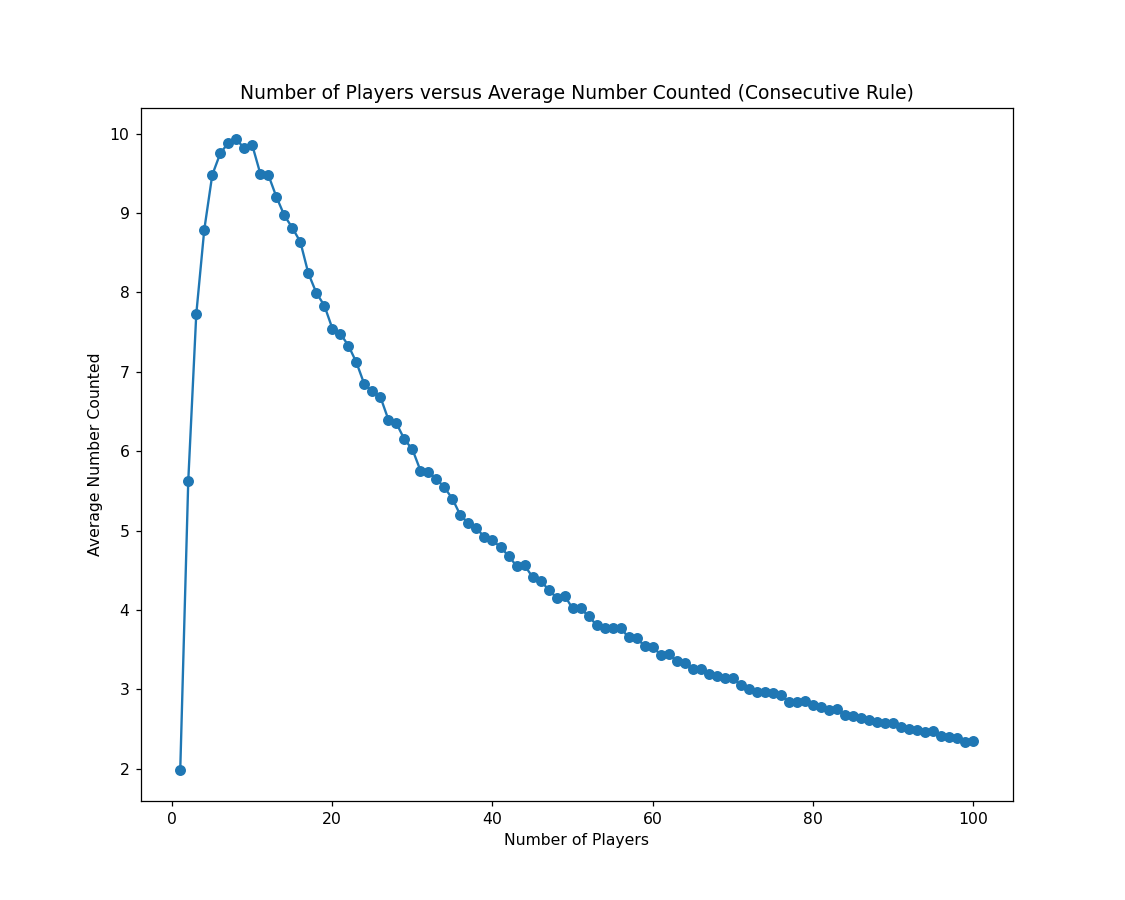

Text(0, 0.5, 'Average Number Counted')

In [10]:
pMean = plt.figure(figsize=(10, 8))
meanPlt = pMean.add_subplot()
meanPlt.plot(plotRange,means)
meanPlt.scatter(plotRange,means)
meanPlt.set_title("Number of Players versus Average Number Counted (Consecutive Rule)")
meanPlt.set_xlabel("Number of Players")
meanPlt.set_ylabel("Average Number Counted")

<IPython.core.display.Javascript object>


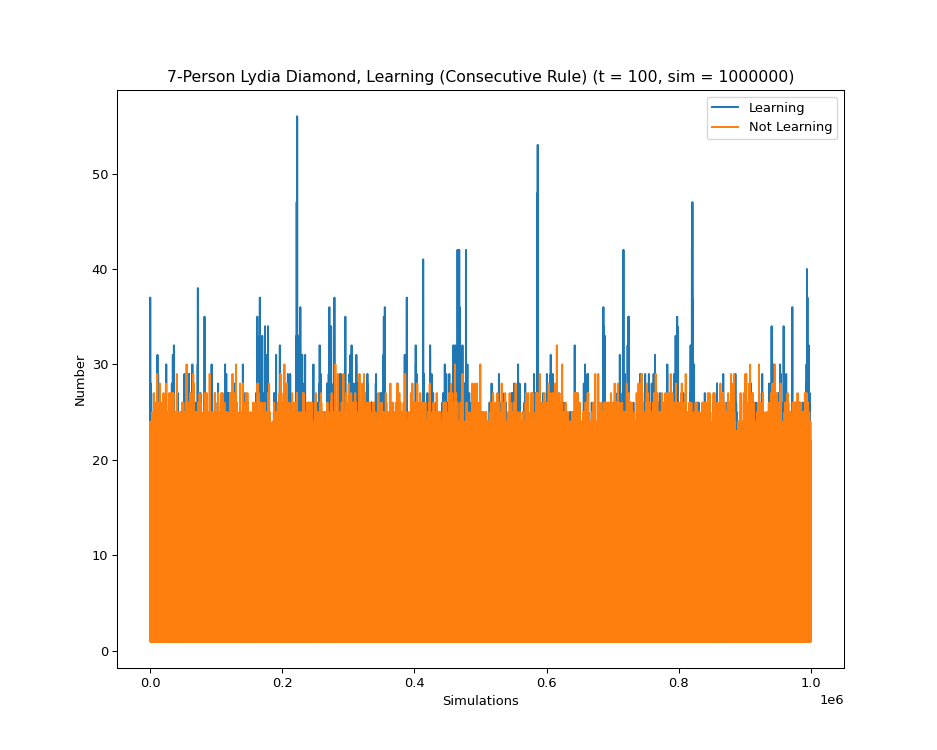

In [27]:
#CASE 1: Learning, time limit constraint

timeLimit = 100
players = 7
simNum = 1000000
playerData = []


p2 = plt.figure(figsize=(10, 8))
plot2 = p2.add_subplot()
numArrNL, timeArrNL = multipleSimulate(players, timeLimit, simNum)





#CASE 2: Learning, time limit constraint
playerData = []


numArrL, timeArrL, rngArr = multipleSimulateLearn(players, timeLimit, simNum)

plot2.set_title(str(players) + "-Person Lydia Diamond, Learning (Consecutive Rule) (t = "+str(timeLimit)+", sim = "+str(simNum)+")")
plot2.set_xlabel("Simulations")
plot2.set_ylabel("Number")


plot2.plot(range(1,len(numArrL)+1), numArrL, label = "Learning")
plot2.plot(range(1,len(numArrNL)+1), numArrNL, label = "Not Learning")
plot2.legend()




In [29]:
print(max(numArrL))

56


<IPython.core.display.Javascript object>


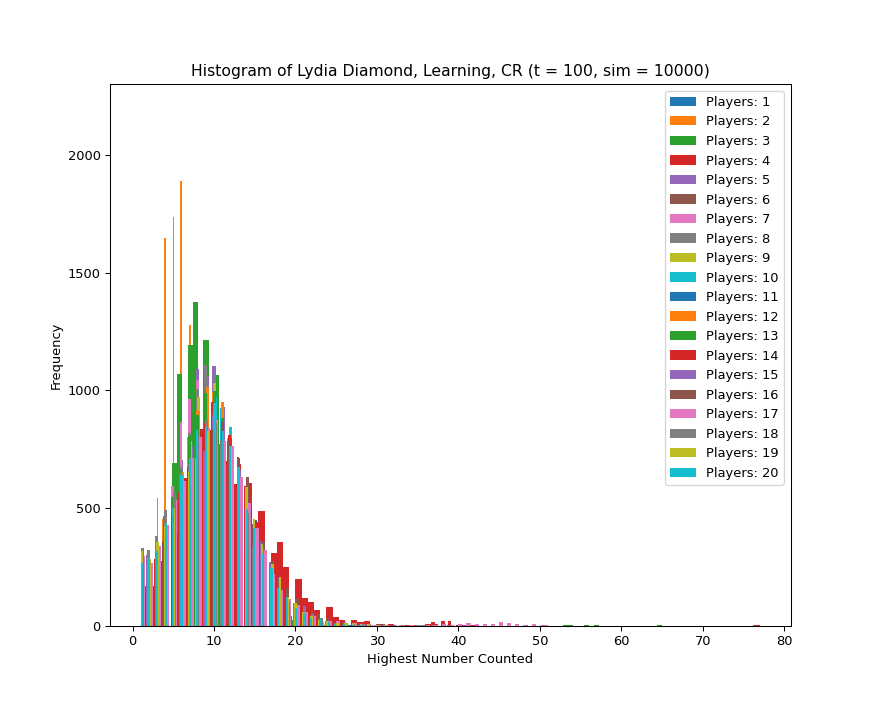

Players: 1, mean: 1.9907
Players: 2, mean: 6.293
Players: 3, mean: 8.6442
Players: 4, mean: 11.4121
Players: 5, mean: 9.6118
Players: 6, mean: 9.7821
Players: 7, mean: 9.081
Players: 8, mean: 9.5031
Players: 9, mean: 9.6208
Players: 10, mean: 9.6299
Players: 11, mean: 9.8446
Players: 12, mean: 9.3093
Players: 13, mean: 9.3515
Players: 14, mean: 10.2628
Players: 15, mean: 10.0859
Players: 16, mean: 10.3926
Players: 17, mean: 10.1363
Players: 18, mean: 9.6077
Players: 19, mean: 9.9979
Players: 20, mean: 9.7727


In [3]:

#CASE 2: Learning, time limit constraint


timeLimit = 100
players = 20
simNum = 10000
playerData = []

p1 = plt.figure(figsize=(10, 8))
plot1 = p1.add_subplot()
means = []

plotRange = range(1, players+1)
for a in plotRange:
    numArr, timeArr, rngArr = multipleSimulateLearn(a, timeLimit, simNum)
    #plot1.plot(range(1,len(numArr)+1), numArr, label=("Players: "+str(a), np.mean(numArr)))
    plot1.hist(numArr, 100, label=("Players: "+str(a)))
    means.append(np.mean(numArr))
    print("Players: "+str(a)+", mean: "+str(np.mean(numArr)))

plot1.set_title("Histogram of Lydia Diamond, Learning, CR (t = "+str(timeLimit)+", sim = "+str(simNum)+")")
plot1.set_xlabel("Highest Number Counted")
plot1.set_ylabel("Frequency")
plt.ylim([0, 2300])

plot1.legend()




<IPython.core.display.Javascript object>


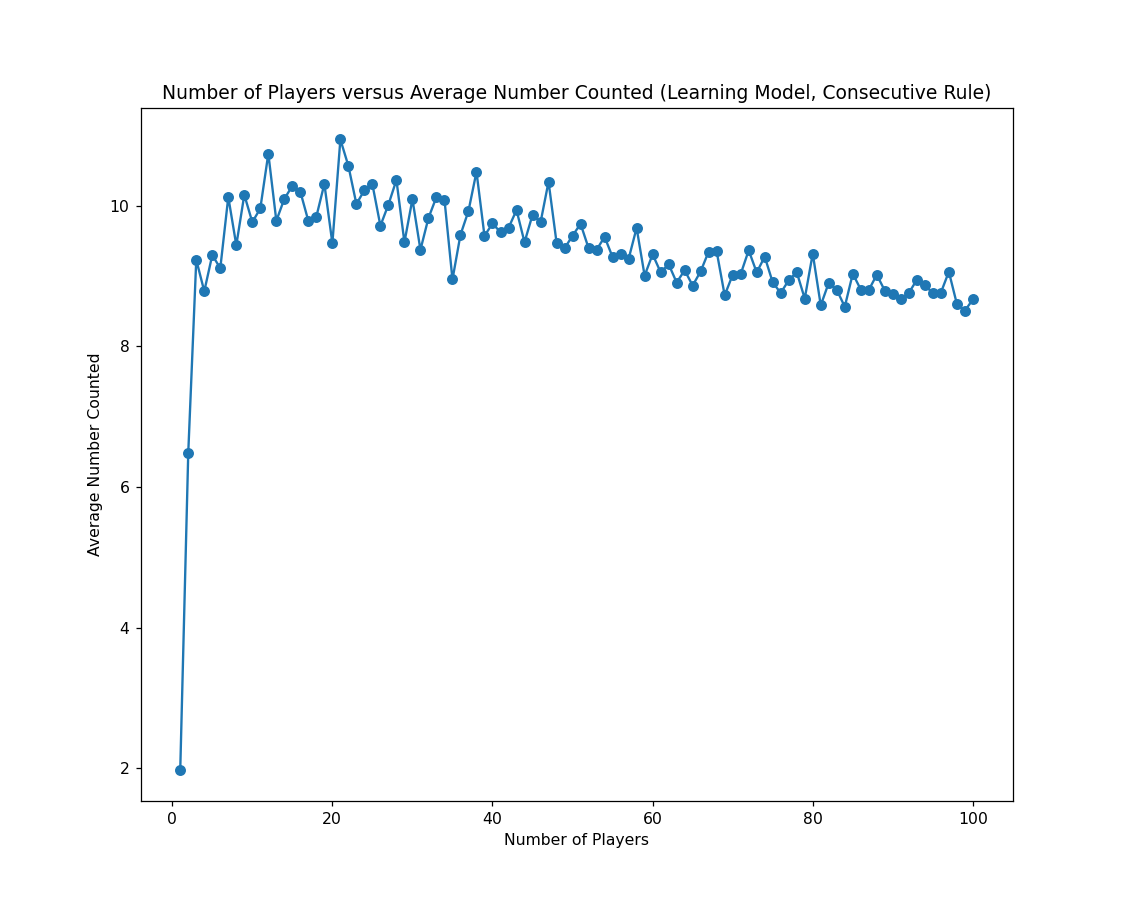

Text(0, 0.5, 'Average Number Counted')

In [12]:
pMean = plt.figure(figsize=(10, 8))
meanPlt = pMean.add_subplot()
meanPlt.plot(plotRange,means)
meanPlt.scatter(plotRange,means)
meanPlt.set_title("Number of Players versus Average Number Counted (Learning Model, Consecutive Rule)")
meanPlt.set_xlabel("Number of Players")
meanPlt.set_ylabel("Average Number Counted")

<IPython.core.display.Javascript object>


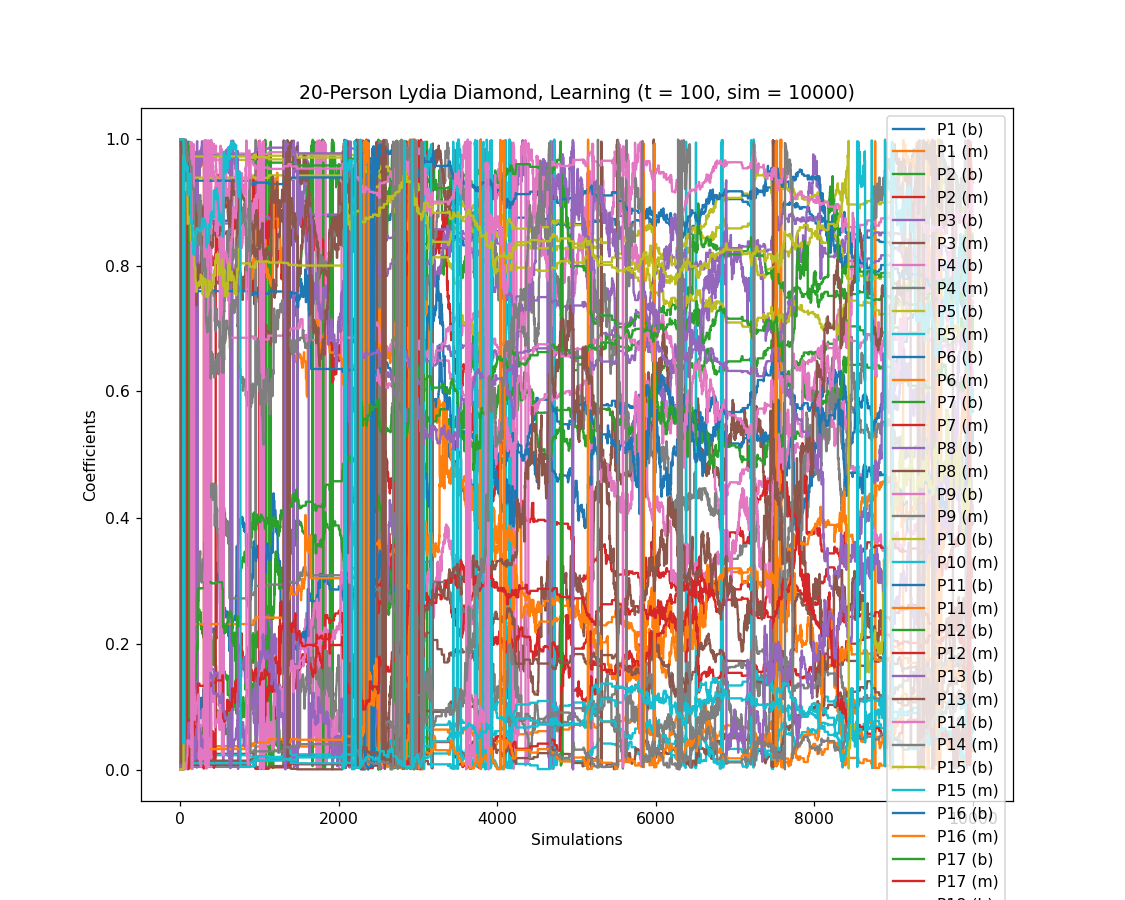

In [22]:
#rngArr: TimeStep, Person, Y-Intercept, Coefficient

p3 = plt.figure(figsize=(10, 8))
plot3 = p3.add_subplot()


coeffvstime = []
for p in range(len(rngArr[0])):
    pArray = [[],[]]
    for a in range(len(rngArr)):
        pArray[0].append(rngArr[a][p][0])
        pArray[1].append(rngArr[a][p][1])
    coeffvstime.append(pArray)
    plot3.plot(range(1,len(pArray[0])+1), pArray[0], label = "P"+str(p+1)+" (b)")
    plot3.plot(range(1,len(pArray[1])+1), pArray[1], label = "P"+str(p+1)+" (m)")

    
plot3.set_title(str(players) + "-Person Lydia Diamond, Learning (t = "+str(timeLimit)+", sim = "+str(simNum)+")")
plot3.set_xlabel("Simulations")
plot3.set_ylabel("Coefficients")
plot3.legend()

    


<IPython.core.display.Javascript object>


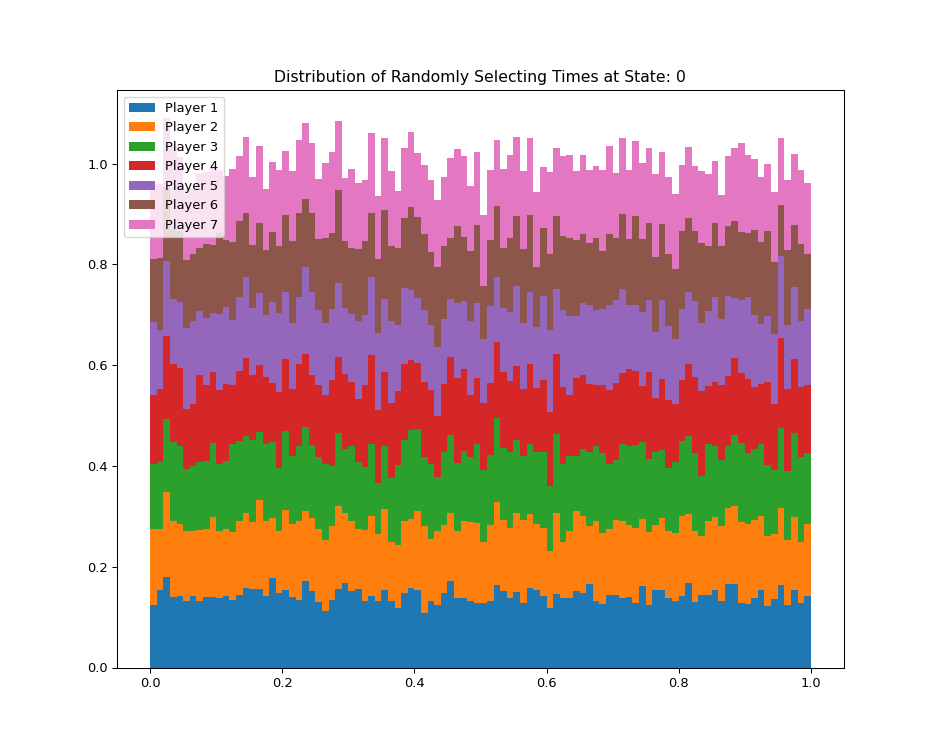

<IPython.core.display.Javascript object>


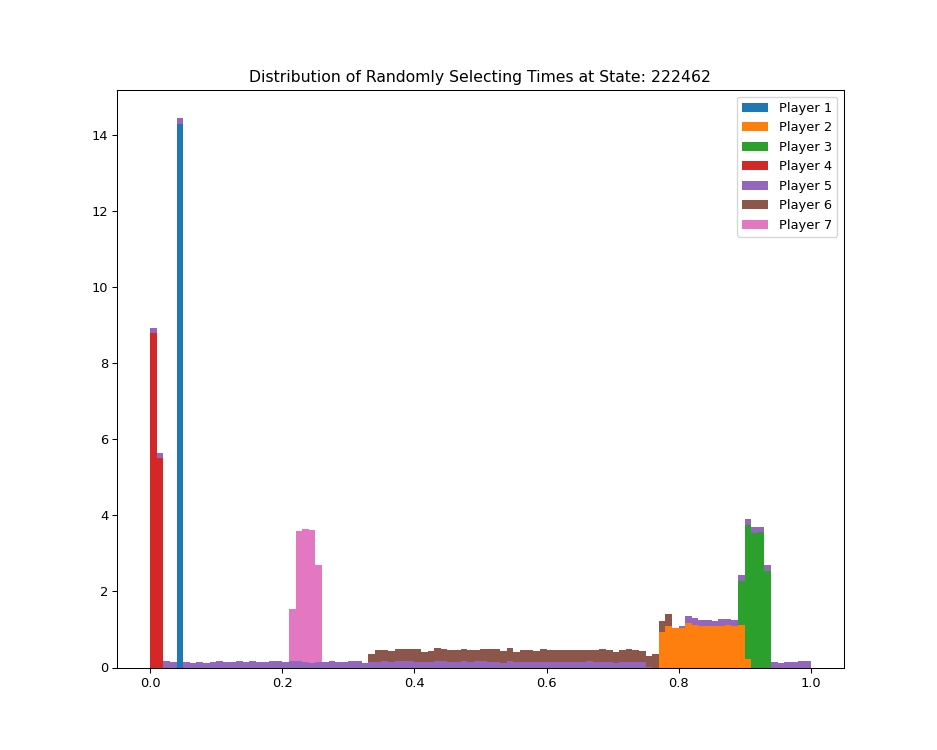

<IPython.core.display.Javascript object>


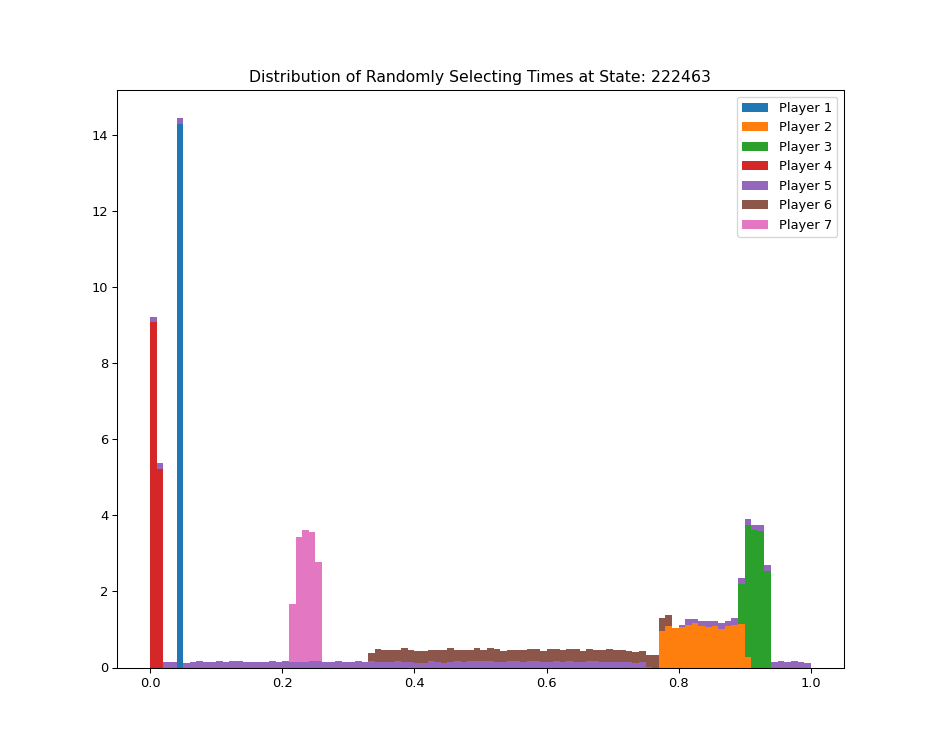

<IPython.core.display.Javascript object>


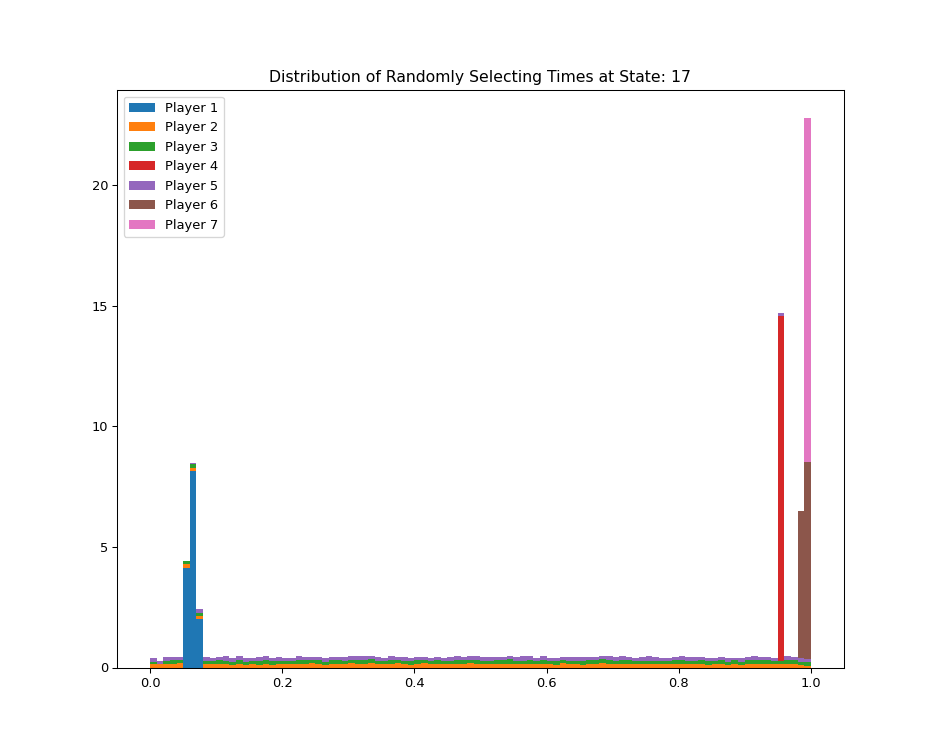

<IPython.core.display.Javascript object>


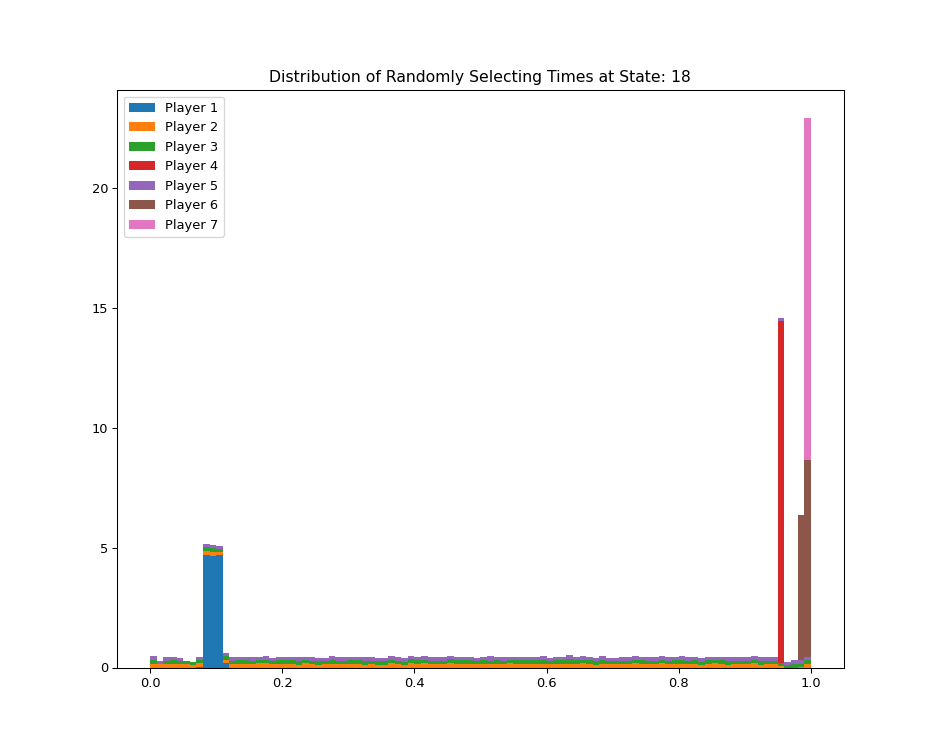

In [30]:




def statePlot(inputArr, num):
    totalVal = []
    playerVal = []
    p4 = plt.figure(figsize=(10, 8))
    plot4 = p4.add_subplot()
    finalState = inputArr
    for a in range(len(finalState)):
        val = []
        for b in range(10000):
            iterVal = abs(finalState[a][0] + finalState[a][1] * rnd.random())
            val.append(iterVal % 1 )
        #print(finalState[a])
        totalVal.append(val)
        playerVal.append("Player "+str(a+1))
    plot4.set_title("Distribution of Randomly Selecting Times at State: " + str(num))
    plot4.hist(totalVal, bins = 100, density=True,histtype='bar', label = playerVal, stacked = True)
    plot4.legend()



statePlot(rngArr[0], 0)

optimal = numArrL.index(max(numArrL))


#statePlot(rngArr[-1])



statePlot(rngArr[222462], 222462)
statePlot(rngArr[optimal], optimal)
statePlot(rngArr[17], 17)
statePlot(rngArr[18], 18)

### 4. Discussion and Future Work

This paper proposes a framework for studying self-organizing collectives, and can have
significant applications in designing optimal network protocols. To manage the transmission and
reception of data along computer networks, Carrier Sense Multiple Carrier (CSMA) protocols are
designed to regulate how data is efficiently sent over a data channel, without losing data (Georgiadis,
2003). Ethernet and Wired channels employ a Collision Detection (CD) protocol, which transmits packets
of data along a channel until a collision is detected, in which the packets wait a random amount of time
before resending (Georgiadis, 2003). On the other hand, Collision Avoidance (CA) protocols are utilized
in wireless networks checks the state of a channel before sending a packet of information, avoiding the
likelihood of data collisions and data loss altogether (Georgiadis, 2003).

While the Lydia Diamond game’s learning model optimizes for the collective to count the highest as a
collective without colluding, the paper’s self-organization learning approach can be applied to optimize
the best CSMA networks for each application. For example, CD networks can be studied in a similar
methodology of Lydia Diamond Game by optimizing for every player to speak at least once in the least
amount of time. We lay the framework for future applications of self-organization for collectives striving
to achieve a goal.